# Drills

Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:

Choose one variable and plot that variable four different ways.

Choose two continuous variables, and plot them three different ways.

Choose one continuous variable and one categorical variable, and plot them six different ways.

Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

#Datasets originally downloaded from AirBnB, stored in separate folder that is not linked to GitHub (space limits)
df = pd.read_csv('~/thinkful_mac/thinkful_large_files/listings_summ.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9147025,Cozy City Island Cottage,403032,Diane,Bronx,City Island,40.844870,-73.789541,Entire home/apt,125,2,30,2016-11-27,2.61,1,151
1,7949480,City Island Sanctuary relaxing BR & Bath w Par...,119445,Linda & Didier,Bronx,City Island,40.852054,-73.788680,Private room,99,1,21,2016-11-21,1.96,1,179
2,6627449,Large 1 BDRM in Great location,13886510,Arlene,Bronx,City Island,40.849775,-73.786609,Entire home/apt,125,3,12,2016-10-24,0.69,1,246
3,1886820,Quaint City Island Community.,9815788,Steve,Bronx,City Island,40.841144,-73.783052,Entire home/apt,300,7,0,NaN,NaN,1,359
4,16042478,WATERFRONT STUDIO APARTMENT,9117975,Collins,Bronx,City Island,40.853491,-73.788607,Private room,200,7,0,NaN,NaN,1,168


/Users/ryanmitchell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


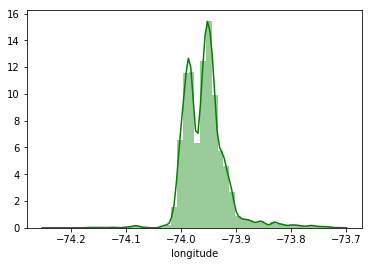

In [5]:
#Continuous variable PLOT 1
sns.distplot(df['longitude'], color = 'g')

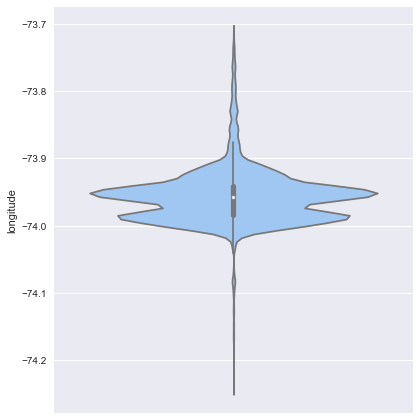

In [7]:
#Continuous variable PLOT 2
sns.set(style = 'darkgrid')
g = sns.factorplot(y="longitude", data=df,
                   size=6, kind="violin", palette="pastel")
plt.show()

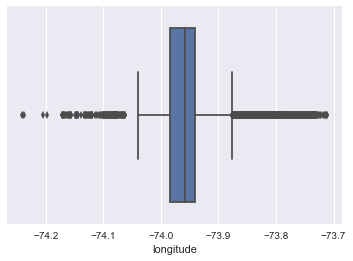

In [8]:
#Continuous variable PLOT 3
sns.boxplot(x = df['longitude'])

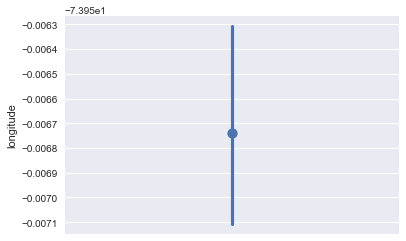

In [9]:
#Continuous variable PLOT 4
sns.pointplot(x= 'longitude', data = df, orient = 'v')

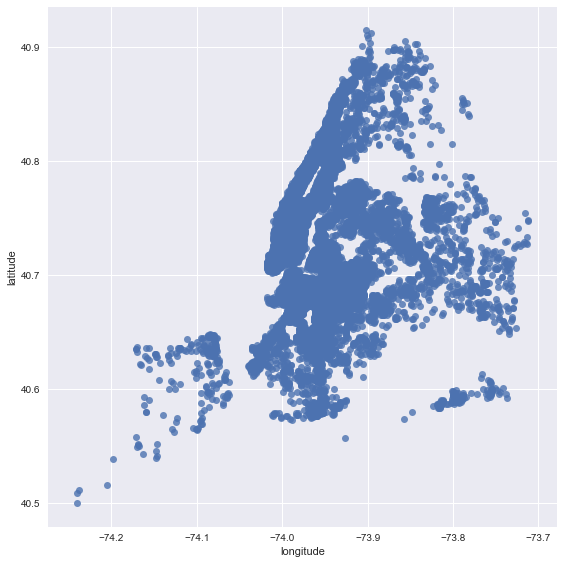

In [10]:
#Two Continuous variables PLOT 1
sns.lmplot("longitude", "latitude", data = df, fit_reg = False, palette = 'pastel', size = 8)

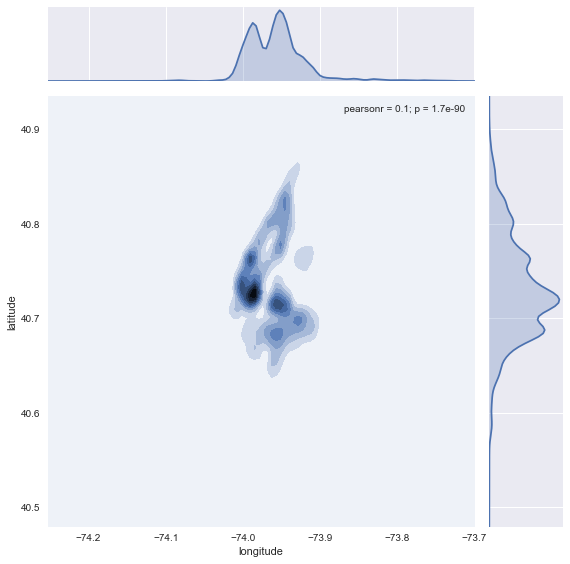

In [11]:
#Two Continuous variables PLOT 2
sns.jointplot(x="longitude", y="latitude", data=df, kind="kde", size = 8)

/Users/ryanmitchell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/ryanmitchell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


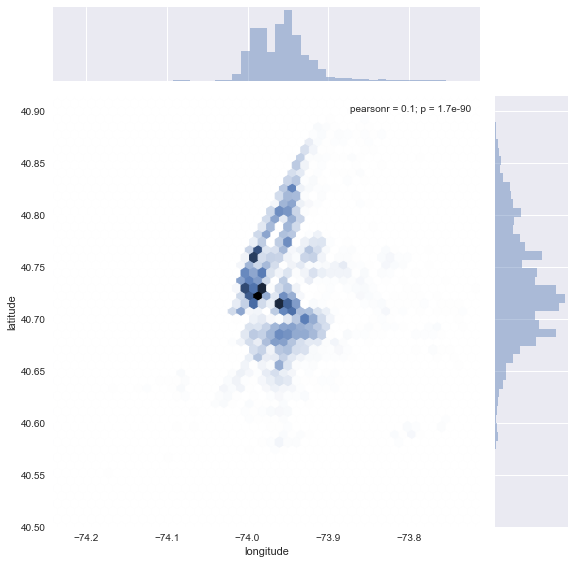

In [12]:
#Two Continuous variables PLOT 3
sns.jointplot(x="longitude", y="latitude", data=df, kind="hex", size = 8)

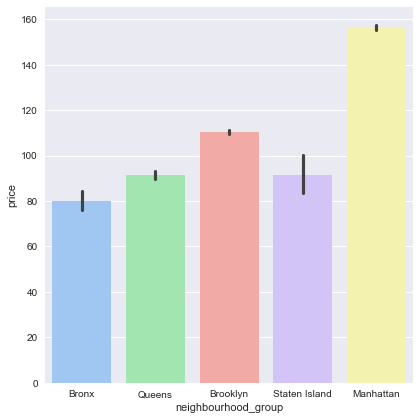

In [13]:
#One continuous variable and one categorical variable PLOT 1
sns.set(style = 'darkgrid')
g = sns.factorplot(x="neighbourhood_group", y="price", data=df[lambda df: df['price'] < 500],
                   size=6, kind="bar", palette="pastel",ci=95)
plt.show()

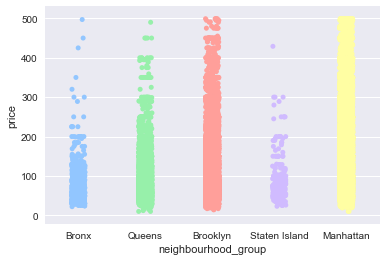

In [19]:
#One continuous variable and one categorical variable PLOT 2
sns.stripplot(x="neighbourhood_group", y="price", data=df.loc[lambda df: df['price'] < 500][:], jitter=True, palette = 'pastel')

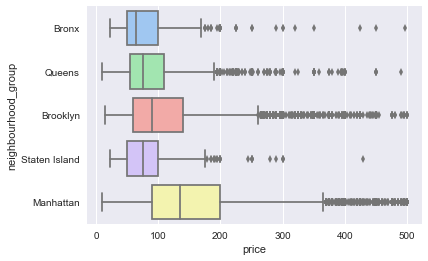

In [20]:
#One continuous variable and one categorical variable PLOT 3
sns.boxplot(x="price", y="neighbourhood_group", data=df[lambda df: df['price'] < 500], palette = 'pastel')

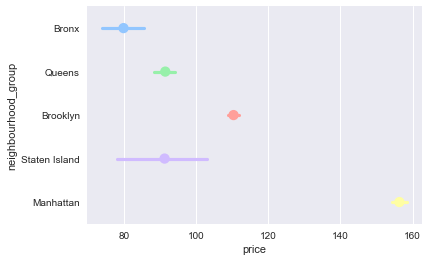

In [23]:
#One continuous variable and one categorical variable PLOT 4
sns.pointplot(x="price", y="neighbourhood_group", data=df[lambda df: df['price'] < 500], palette = 'pastel', ci = 99.99)

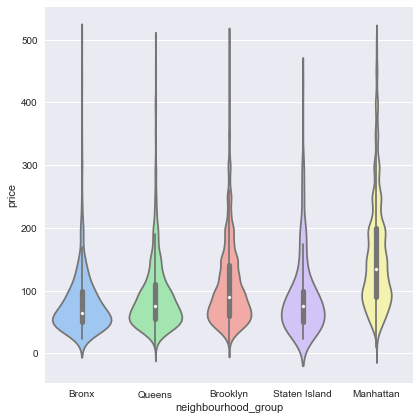

In [24]:
#One continuous variable and one categorical variable PLOT 5
sns.set(style = 'darkgrid')
g = sns.factorplot(y="price", x="neighbourhood_group", data=df[lambda df: df['price'] < 500],
                   size=6, kind="violin", palette="pastel")
plt.show()

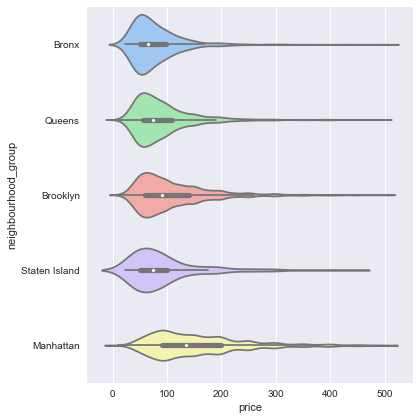

In [26]:
#One continuous variable and one categorical variable PLOT 6
sns.set(style = 'darkgrid')
g = sns.factorplot(x="price", y="neighbourhood_group", data=df[lambda df: df['price'] < 500],
                   size=6, kind="violin", palette="pastel")
plt.show()

# Challenge 

As an optional challenge, find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:

Probability distributions

Bivariate relationships

Whether the distributions or the relationships vary across groups

In [42]:
df2 = df.loc[lambda df: df['price'] < 500][['neighbourhood_group', 'price', 'number_of_reviews', 'reviews_per_month', 'availability_365']]

/Users/ryanmitchell/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/ryanmitchell/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


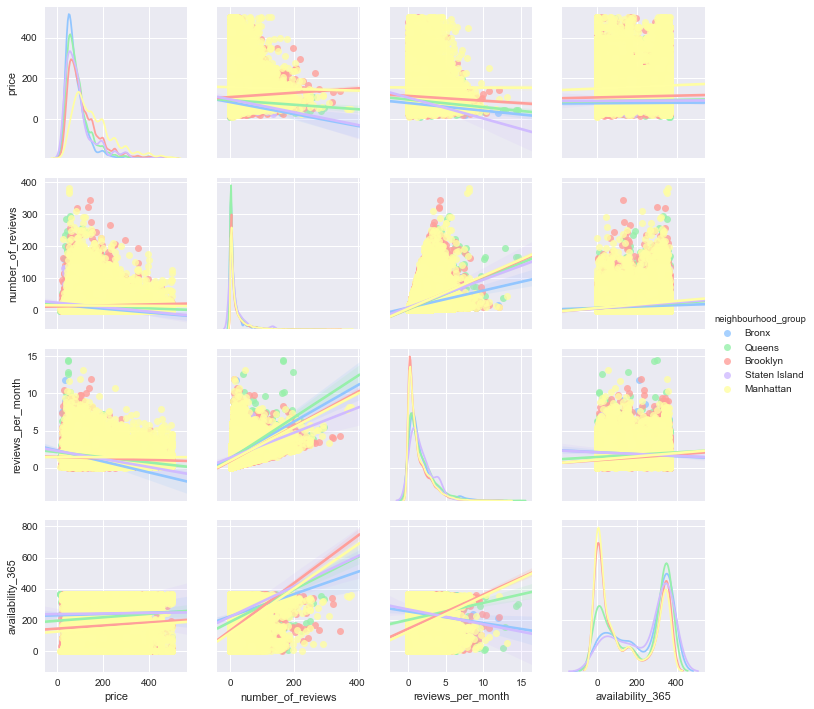

In [47]:
g = sns.pairplot(df2, hue = 'neighbourhood_group', diag_kind="kde", kind = 'reg', palette = 'pastel')